In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("C:\\Users\\icibe\\OneDrive\\Desktop\\datasets\\training.csv")
df_test = pd.read_csv("C:\\Users\\icibe\\OneDrive\\Desktop\\datasets\\testing.csv")

In [5]:
df_train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [7]:
df_test.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


<Axes: xlabel='class', ylabel='count'>

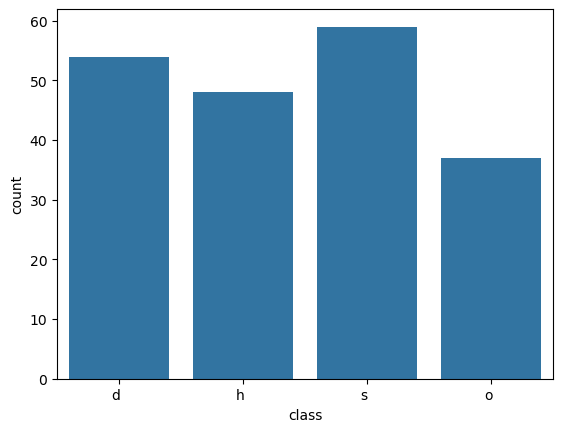

In [9]:
sns.countplot(x="class",data = df_train)

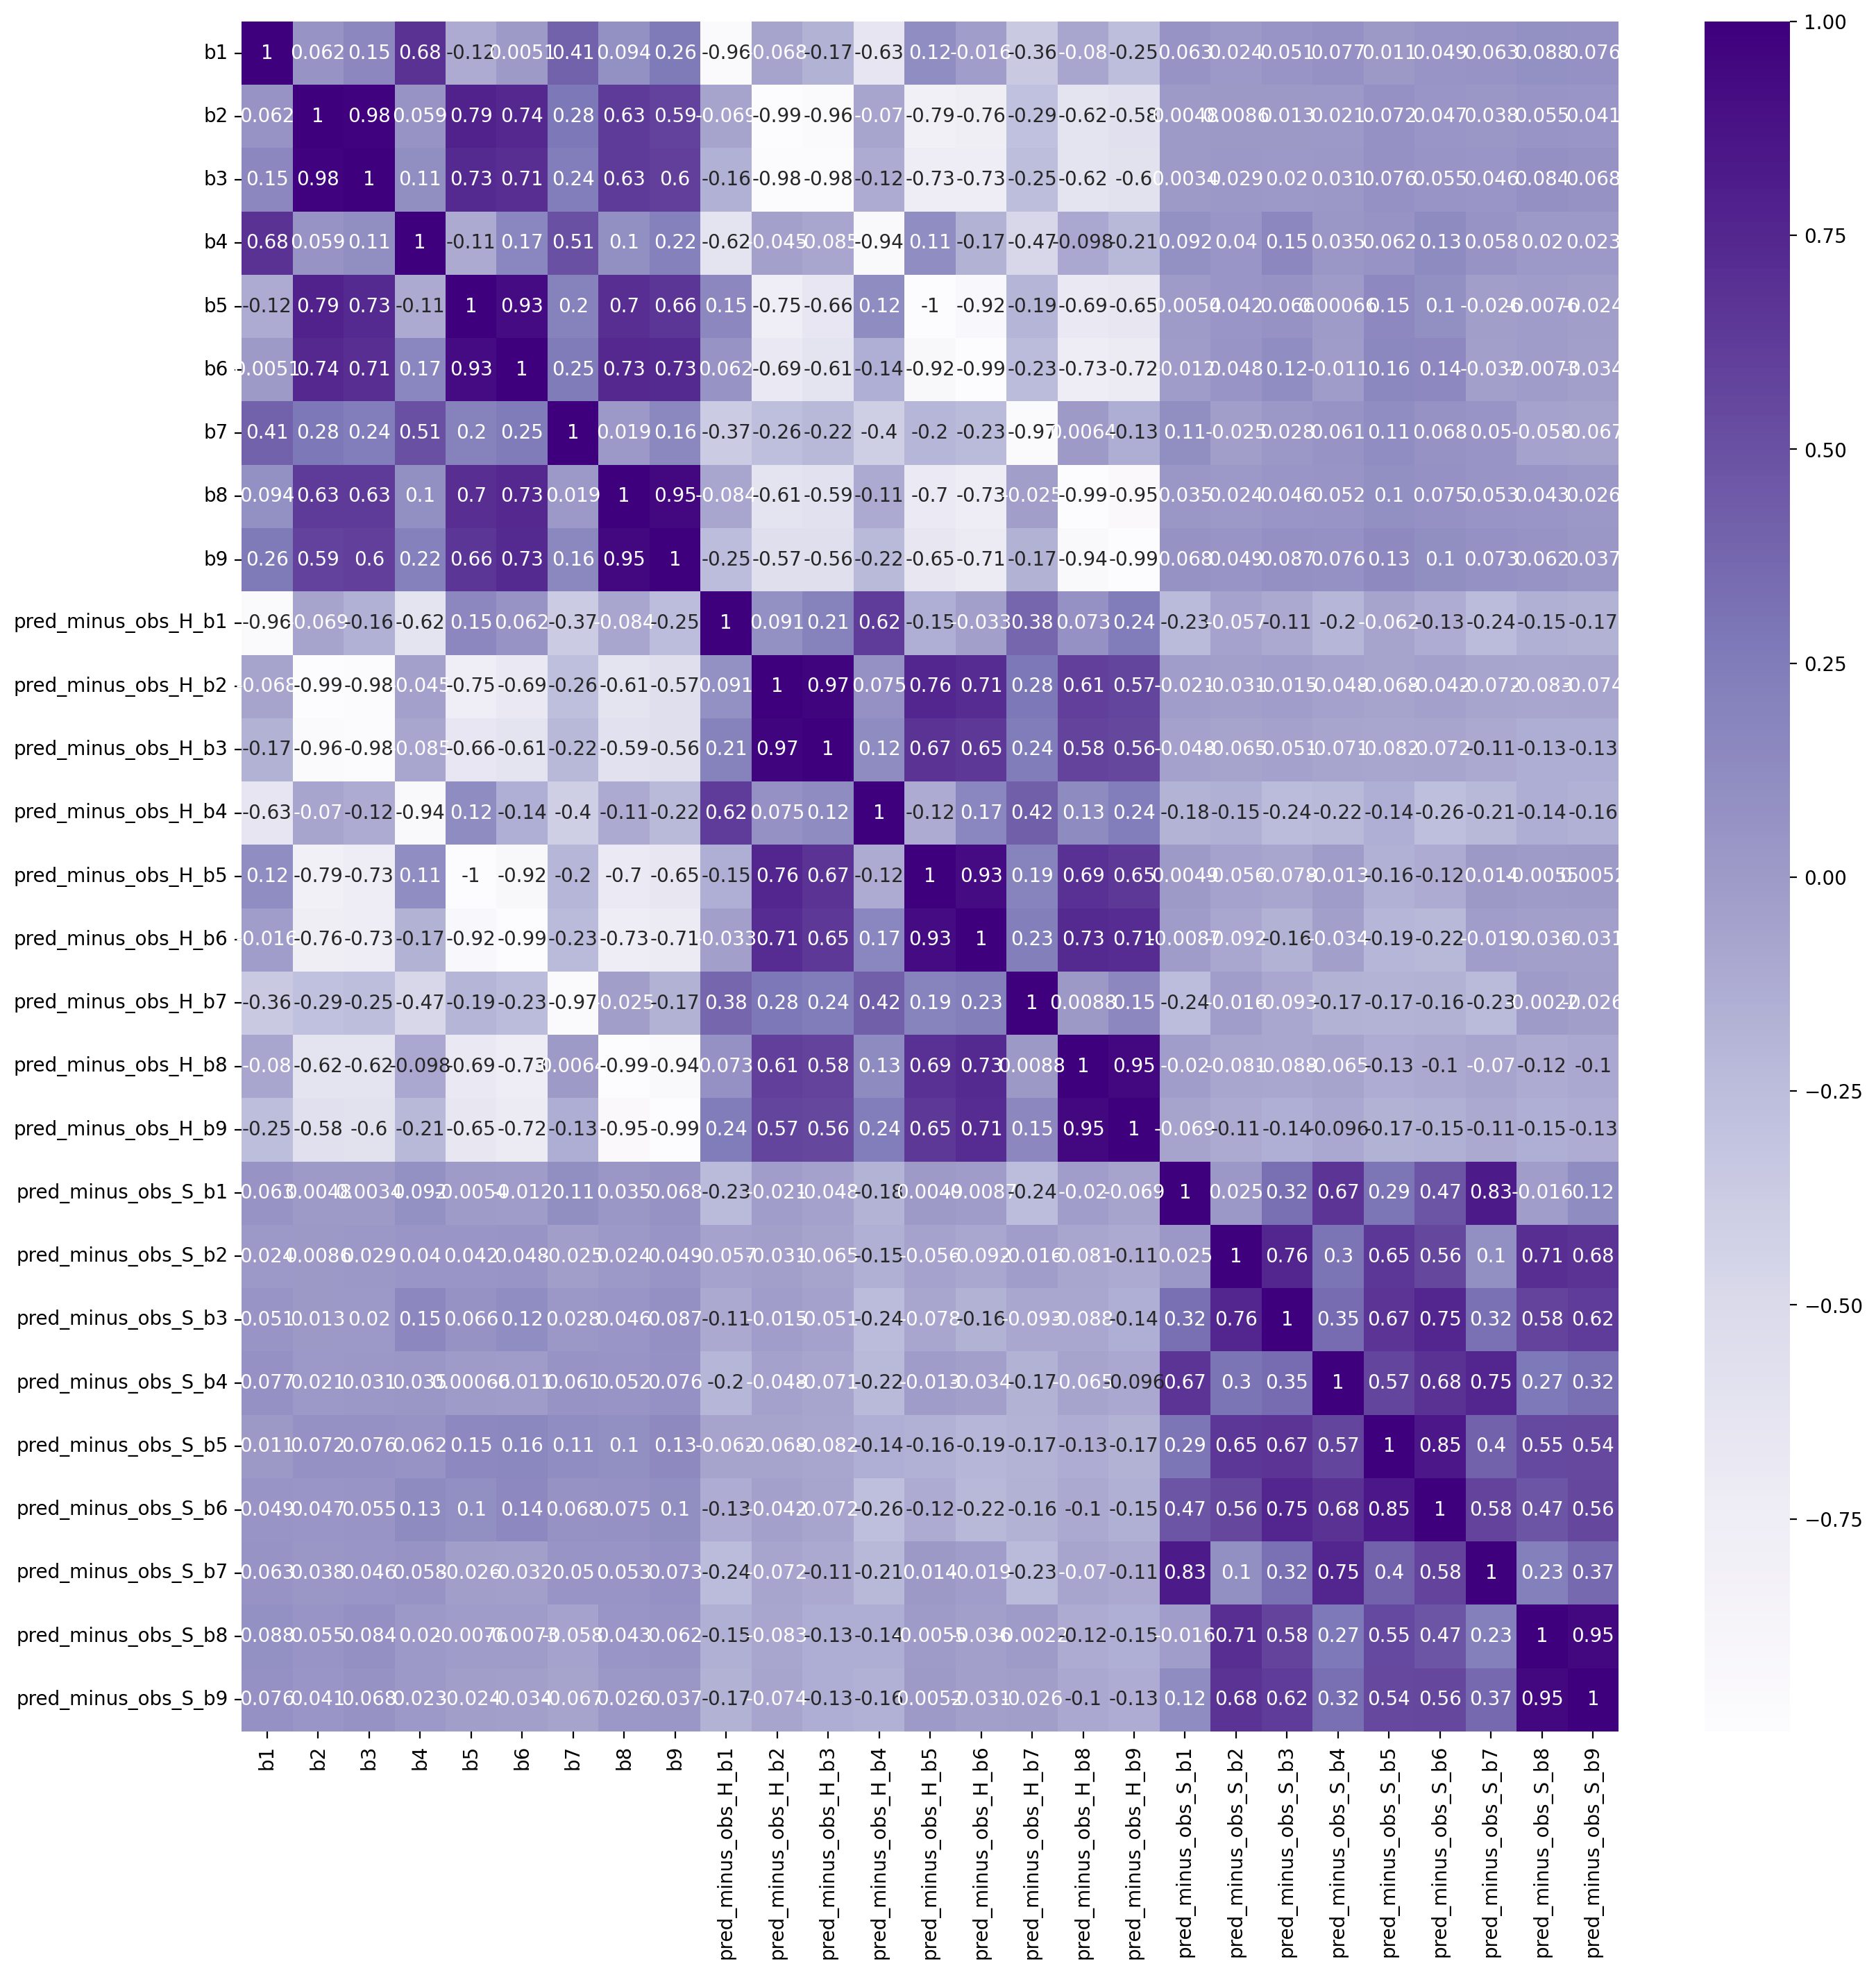

In [11]:
plt.figure(figsize=(16,16),dpi=200)
sns.heatmap(df_train.select_dtypes(include='number').corr(),annot=True,cmap="Purples")
plt.savefig("corrFtm.png")

In [13]:
X_train = df_train.drop("class", axis=1)
y_train = df_train["class"]

In [15]:
X_test = df_test.drop("class",axis=1)
y_test = df_test["class"]

# KNN     n=3,  Özellik Sayısı=23

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

In [19]:
# Pipeline: 23 ozelligi sec, olceklendirme yap, KNN uygula
knn = Pipeline([
    ('select', SelectKBest(score_func=f_classif, k=23)),
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])
# Manuel olarak ozellik sayilari denendiginde en yuksek dogruluk oranı 23te cıktı

In [22]:
knn.fit(X_train, y_train)

Pipeline(steps=[('select', SelectKBest(k=23)), ('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [24]:
knn_y_pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [28]:
print("Accuracy:", accuracy_score(y_test, knn_y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, knn_y_pred))

Accuracy: 0.8492307692307692

Sınıflandırma Raporu:
               precision    recall  f1-score   support

          d        0.86      0.85      0.85       105
          h        0.73      0.87      0.80        38
          o        0.85      0.76      0.80        46
          s        0.88      0.88      0.88       136

    accuracy                           0.85       325
   macro avg       0.83      0.84      0.83       325
weighted avg       0.85      0.85      0.85       325



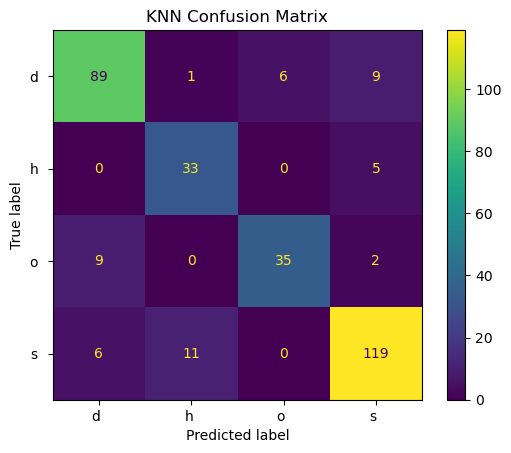

In [30]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title("KNN Confusion Matrix")
plt.savefig("knnConfMx.png")

In [32]:
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

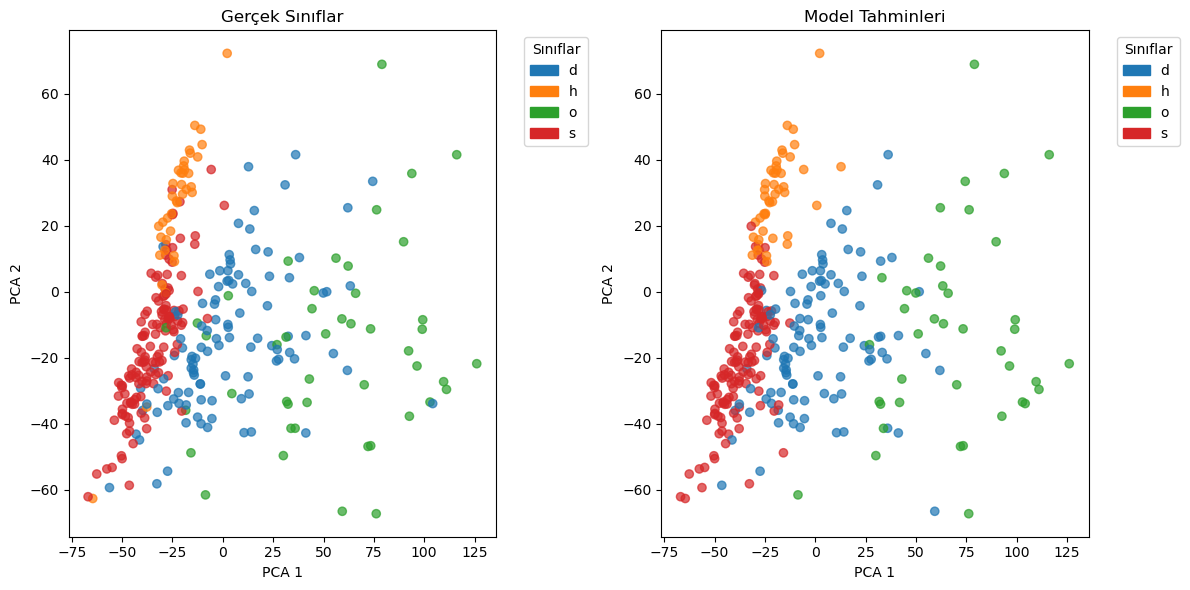

In [34]:
# PCA ile 2 boyuta indir
pca = PCA(n_components=2)
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)


# Sınıf etiketleri ve renk eşlemesi
class_labels = np.unique(np.concatenate([y_test, knn_y_pred]))
color_map = {label: plt.cm.tab10(i % 10) for i, label in enumerate(class_labels)}

# Renkleri ata
colors_test = [color_map[label] for label in y_test]
colors_pred = [color_map[label] for label in knn_y_pred]

# Legend için patch'ler
legend_patches = [mpatches.Patch(color=color_map[label], label=str(label)) for label in class_labels]

# Grafikler
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=colors_test, alpha=0.7)
plt.title("Gerçek Sınıflar")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(handles=legend_patches, title="Sınıflar", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 2, 2)
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=colors_pred, alpha=0.7)
plt.title("Model Tahminleri")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(handles=legend_patches, title="Sınıflar", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Support Vector Machine

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [41]:
# Denenecek C değerleri
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

svc = SVC() 
grid_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
grid_svc.fit(X_train, y_train)

print("En iyi C:", grid_svc.best_params_['C'])
print("En yüksek doğruluk:", grid_svc.best_score_)

En iyi C: 100
En yüksek doğruluk: 0.9798717948717949


In [43]:
# SVM modeli oluştur ve eğit
svm = SVC(kernel="rbf", C=100, gamma="scale")
svm.fit(X_train_scaled, y_train)

SVC(C=100)

In [45]:
svm_y_pred = svm.predict(X_test_scaled)

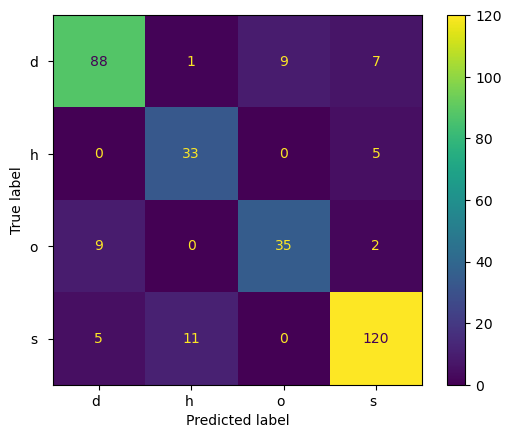

In [47]:
ConfusionMatrixDisplay.from_estimator(svm,X_test_scaled,y_test)
plt.savefig("svmConfMx.png")

In [49]:
print("Accuracy Score: ",accuracy_score(y_test,svm_y_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_y_pred))

Accuracy Score:  0.8492307692307692

Classification Report:
               precision    recall  f1-score   support

          d        0.86      0.84      0.85       105
          h        0.73      0.87      0.80        38
          o        0.80      0.76      0.78        46
          s        0.90      0.88      0.89       136

    accuracy                           0.85       325
   macro avg       0.82      0.84      0.83       325
weighted avg       0.85      0.85      0.85       325



# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [54]:
log_model = LogisticRegression(solver="saga" ,multi_class="ovr",max_iter=1000)

In [56]:
penalty = ["l1","l2"]

C = np.logspace(0,5,16)

In [58]:
grid_log_model = GridSearchCV(
    log_model,
    param_grid={
        "C": C,
        "penalty": penalty
    }
)

In [60]:
grid_log_model.fit(X_train_scaled,y_train)

C:\Users\icibe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\icibe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\icibe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\icibe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\icibe\anaconda3\Lib\site-packages\sklearn

GridSearchCV(estimator=LogisticRegression(max_iter=1000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04, 2.15443469e+04, 4.64158883e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [62]:
grid_log_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [64]:
log_pred = grid_log_model.predict(X_test_scaled)

In [66]:
accuracy_score(y_test,log_pred)

0.8430769230769231

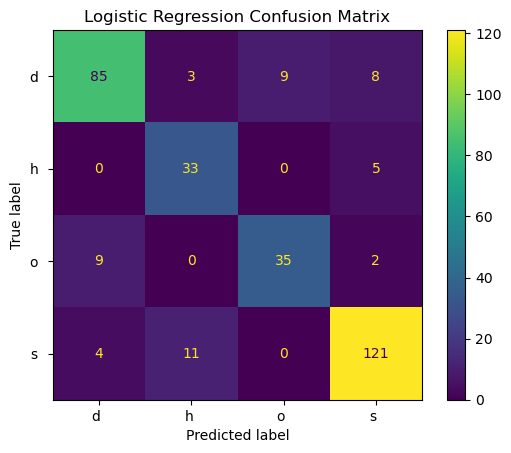

In [68]:
ConfusionMatrixDisplay.from_estimator(grid_log_model,X_test_scaled,y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.savefig("logConfMx.png")

In [70]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

          d        0.87      0.81      0.84       105
          h        0.70      0.87      0.78        38
          o        0.80      0.76      0.78        46
          s        0.89      0.89      0.89       136

    accuracy                           0.84       325
   macro avg       0.81      0.83      0.82       325
weighted avg       0.85      0.84      0.84       325



# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
n_est = [9,64,128,200,256]
max_feat = [1,2,3,4,7,15,20]
bootstrap_sec = [True,False]
oob = [True,False]


In [77]:
parameters = {
    "n_estimators": n_est,
    "max_features": max_feat,
    "bootstrap": bootstrap_sec,
    "oob_score": oob
}

In [79]:
random_forest = RandomForestClassifier(random_state=42)

In [81]:
rand_grid = GridSearchCV(random_forest,parameters)

In [83]:
rand_grid.fit(X_train,y_train)

C:\Users\icibe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\icibe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\icibe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\icibe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\icibe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probab

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4, 7, 15, 20],
                         'n_estimators': [9, 64, 128, 200, 256],
                         'oob_score': [True, False]})

In [84]:
rand_grid.best_estimator_

RandomForestClassifier(max_features=4, n_estimators=200, oob_score=True,
                       random_state=42)

In [87]:
rand_pred = rand_grid.predict(X_test)

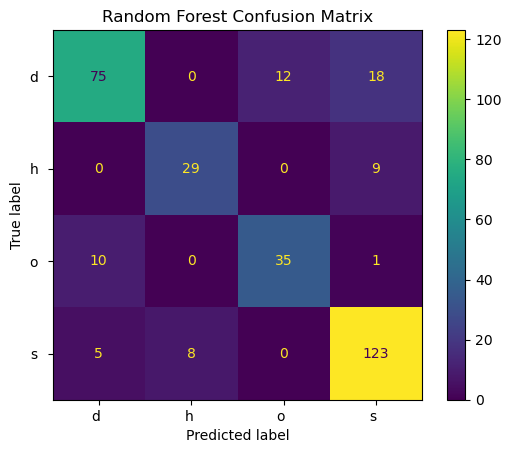

In [89]:
ConfusionMatrixDisplay.from_estimator(rand_grid,X_test,y_test)
plt.title("Random Forest Confusion Matrix")
plt.savefig("randConfMx.png")

In [91]:
print(classification_report(y_test,rand_pred))

              precision    recall  f1-score   support

          d        0.83      0.71      0.77       105
          h        0.78      0.76      0.77        38
          o        0.74      0.76      0.75        46
          s        0.81      0.90      0.86       136

    accuracy                           0.81       325
   macro avg       0.79      0.79      0.79       325
weighted avg       0.81      0.81      0.80       325



# Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [96]:
tree = DecisionTreeClassifier(max_depth=2,random_state=42)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [98]:
def model_sonuc(dec_model):
    tree_pred = dec_model.predict(X_test)

    print("Classification Report:\n")
    print(classification_report(y_test,tree_pred))

    ConfusionMatrixDisplay.from_estimator(dec_model,X_test,y_test)
    plt.title("Decision Tree Confusion Matrix")
    plt.show()

    acc_tree = accuracy_score(y_test, tree_pred)

Classification Report:

              precision    recall  f1-score   support

          d        0.86      0.70      0.77       105
          h        0.84      0.68      0.75        38
          o        0.76      0.80      0.78        46
          s        0.79      0.93      0.85       136

    accuracy                           0.81       325
   macro avg       0.81      0.78      0.79       325
weighted avg       0.81      0.81      0.80       325



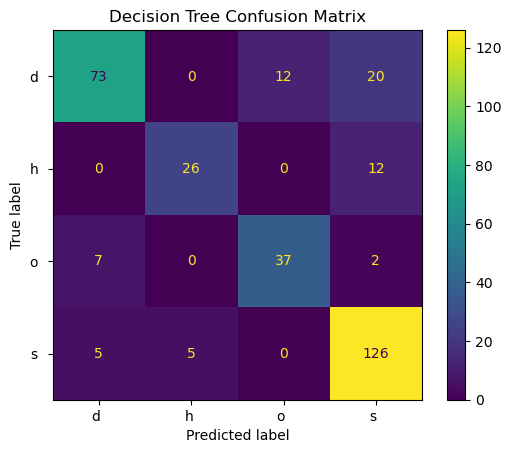

In [100]:
model_sonuc(tree)

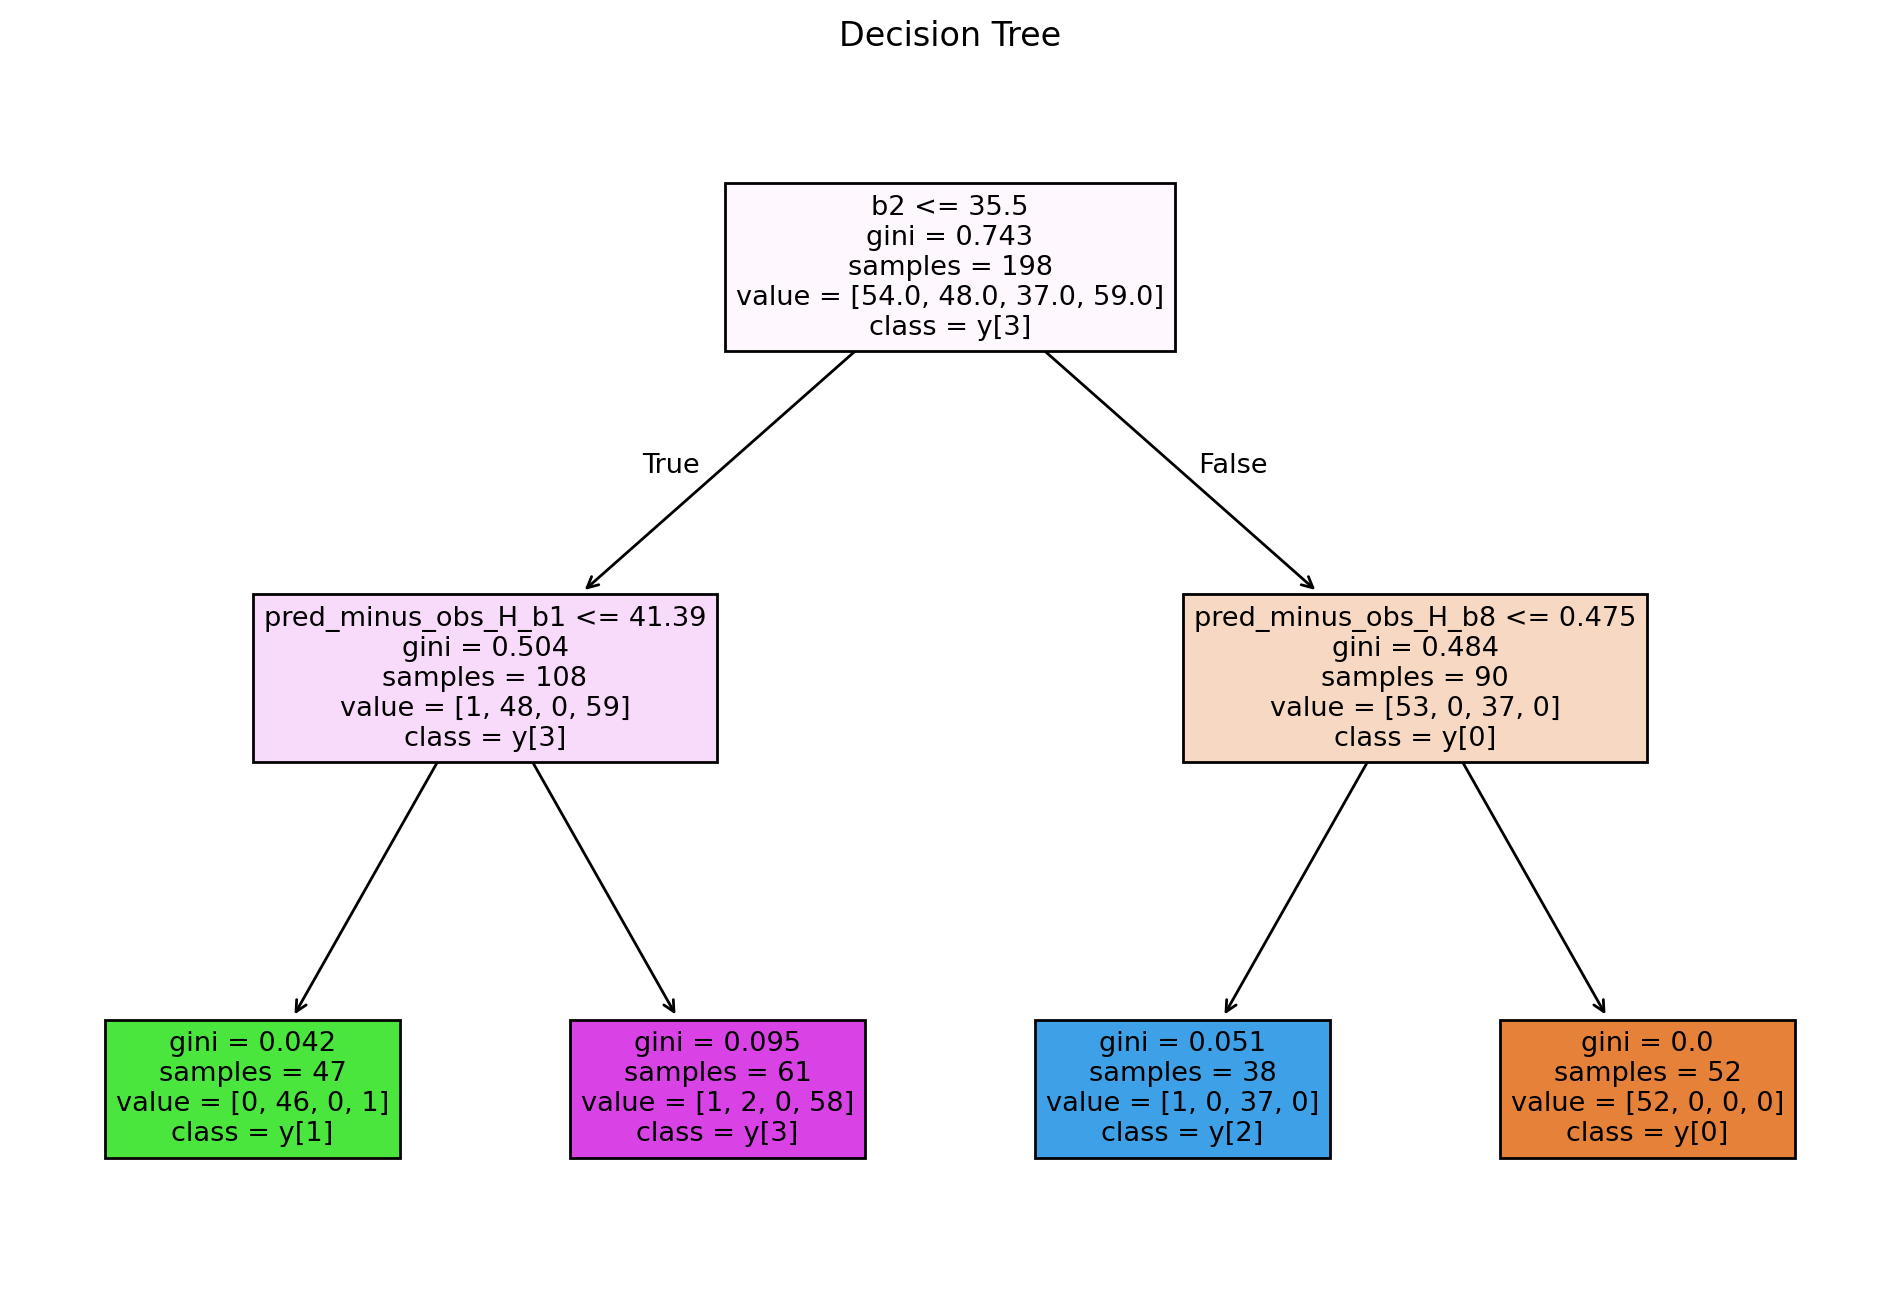

In [102]:
plt.figure(figsize=(12, 8), dpi=200)
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=True)
plt.title("Decision Tree")
plt.show()

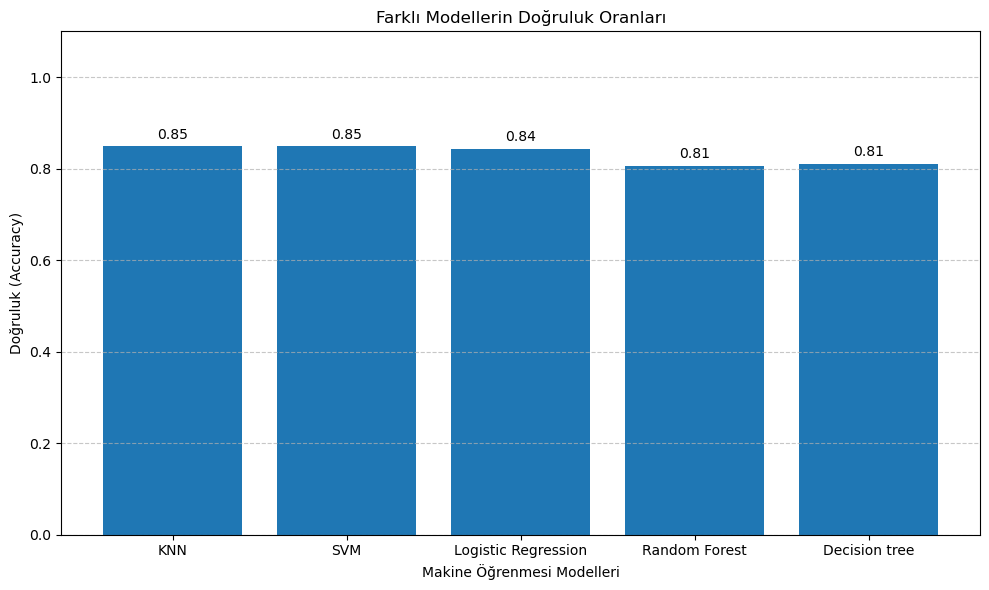

In [110]:
knn_acc = accuracy_score(y_test, knn_y_pred)
svm_acc = accuracy_score(y_test, svm_y_pred)
log_acc = accuracy_score(y_test, log_pred)
rand_acc = accuracy_score(y_test, rand_pred)


model_adlari = ['KNN', 'SVM', 'Logistic Regression', 'Random Forest', 'Decision tree']
dogruluk_oranlari = [knn_acc, svm_acc, log_acc, rand_acc, 0.81]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_adlari, dogruluk_oranlari)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.ylim(0, 1.1)  # doğruluk 0-1 arası olduğu için
plt.title("Farklı Modellerin Doğruluk Oranları")
plt.xlabel("Makine Öğrenmesi Modelleri")
plt.ylabel("Doğruluk (Accuracy)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()